In [1]:
data_path = '/home/hanjiechen/YanweiJIN/Data/MMData/1'
result_path = '/home/hanjiechen/YanweiJIN/BP_est/bp_result/MMData/1/all'
import scipy.io
S1rest1_1 = scipy.io.loadmat(f'{data_path}/processed_D29_rest1_1.mat')
S1rest1_2 = scipy.io.loadmat(f'{data_path}/processed_D29_rest1_2.mat')
S1CT_1_1 = scipy.io.loadmat(f'{data_path}/processed_D29_CT_1_1.mat')
S1recover_1_1 = scipy.io.loadmat(f'{data_path}/processed_D29_recover_1_1.mat')
S1recover_2 = scipy.io.loadmat(f'{data_path}/processed_D29_recover_2.mat')
S1rest2_1_1 = scipy.io.loadmat(f'{data_path}/processed_D29_rest2_1_1.mat')
fs=2000

In [2]:
import numpy as np
S1rest = np.concatenate((S1rest1_1['processed_D29_rest1_1'], S1rest1_2['processed_D29_rest1_2'], S1rest2_1_1['processed_D29_rest2_1_1']), axis=1)
print(f"S1rest shape: {S1rest.shape}")
S1CT = S1CT_1_1['processed_D29_CT_1_1']
print(f"S1CT shape: {S1CT.shape}")
S1recover = np.concatenate((S1recover_1_1['processed_D29_recover_1_1'], S1recover_2['processed_D29_recover_2']), axis=1)
print(f"S1recover shape: {S1recover.shape}")
S1 = np.concatenate((S1rest1_1['processed_D29_rest1_1'], S1rest1_2['processed_D29_rest1_2'], S1CT_1_1['processed_D29_CT_1_1'], S1recover_1_1['processed_D29_recover_1_1'], S1recover_2['processed_D29_recover_2'], S1rest2_1_1['processed_D29_rest2_1_1']), axis=1)
print(f"S1 shape: {S1.shape}")

S1rest shape: (5, 436003)
S1CT shape: (5, 60001)
S1recover shape: (5, 392002)
S1 shape: (5, 888006)


In [3]:
S1_ori = {}
S1_ori['Tag'] = ['ECG', 'CBP', 'PPG', 'IPG', 'Temp']
for i in range(len(S1_ori['Tag'])):
    S1_ori[S1_ori['Tag'][i]] = S1[i]
print(f"S1_ori: {S1_ori}")

S1_ori: {'Tag': ['ECG', 'CBP', 'PPG', 'IPG', 'Temp'], 'ECG': array([ 0.01854797,  0.01739228,  0.01034744, ..., -0.00053132,
       -0.0007871 , -0.00029637]), 'CBP': array([77.88077422, 77.91129177, 77.51456362, ..., 75.74454572,
       75.98868612, 75.56144042]), 'PPG': array([-0.45968531, -0.45969324, -0.45968765, ..., -0.55090143,
       -0.55088413, -0.55086696]), 'IPG': array([44.3438614 , 44.34387504, 44.34388739, ..., 45.24709229,
       45.24709457, 45.24709684]), 'Temp': array([29.5113661 , 29.51135658, 29.51134705, ..., 29.88274966,
       29.8827656 , 29.88278154])}


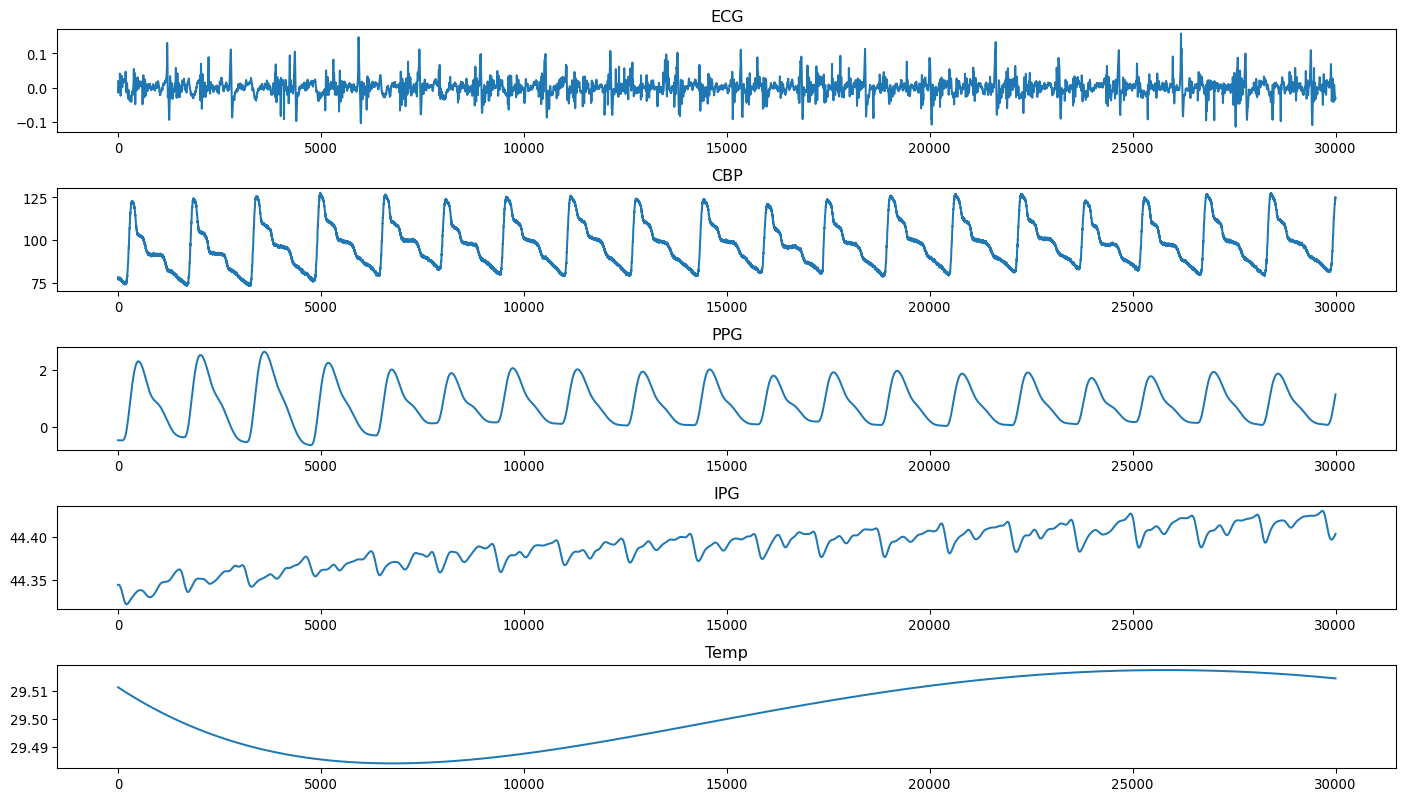

In [4]:
signal = S1_ori
begin_index = 0
end_index = 30000 #S1.shape[1]
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18, 10), dpi=96)
for i in range(5):
    axs[i].plot(signal[f"{signal['Tag'][i]}"][begin_index:end_index])
    axs[i].set_title(f"{signal['Tag'][i]}")
fig.subplots_adjust(hspace=0.55)
plt.savefig(f"{result_path}/S1_ori_{int(begin_index/fs)}to{int(end_index/fs)}sec.png")
plt.show()

filtered_ecg: [ 1.70622612e-03 -8.91156660e-04 -3.49655107e-03 ...  2.22685207e-04
  2.27540859e-05 -1.36088849e-04]


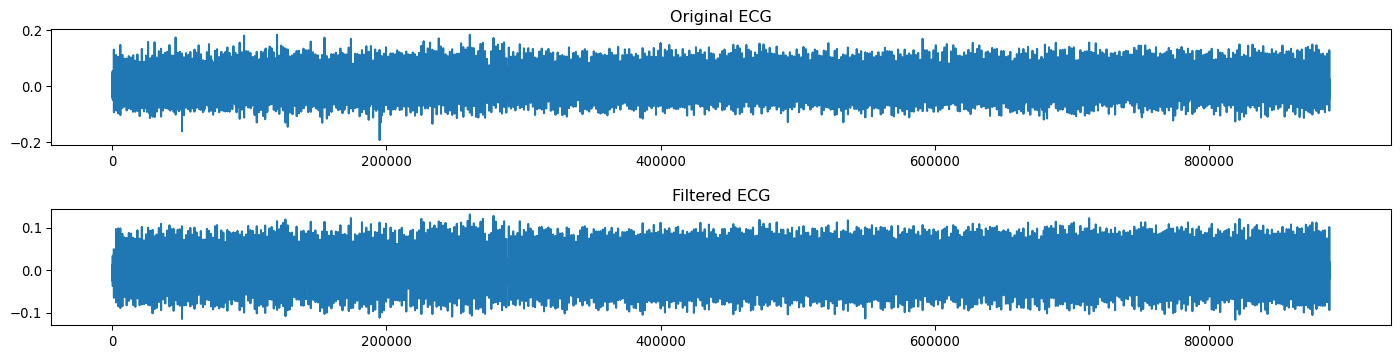

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

ecg_signal = S1_ori['ECG']#[0:20000]
lowcut = 10.0
highcut = 50.0
order = 4
b,a = signal.butter(order, [lowcut, highcut], btype='band', fs=fs)
ecg_filtered = signal.filtfilt(b, a, ecg_signal)
S1_ori['Tag'].append('ECGf')
S1_ori['ECGf'] = ecg_filtered
print(f"filtered_ecg: {ecg_filtered}")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18,4),dpi=96)
axs[0].plot(ecg_signal, label='Original ECG')
#axs[0].legend()
axs[0].set_title('Original ECG')
axs[1].plot(ecg_filtered, label='Filtered ECG')
#axs[1].legend()
axs[1].set_title('Filtered ECG')
fig.subplots_adjust(hspace=0.55)
plt.savefig(f"{result_path}/S1_{int(len(ecg_signal)/fs)}sec_ori_fil_ECG.png")
plt.show()

Seg_index: [0, 40000, 80000, 120000, 160000, 200000, 240000, 280000, 320000, 360000, 400000, 440000, 480000, 520000, 560000, 600000, 640000, 680000, 720000, 760000, 800000, 840000, 880000, 888006]
R peak index: 558, [2776, 4355, 5928, 7425, 8932, 10528, 12133, 13783, 15346, 16831, 18404, 20003, 21620, 23181, 24657, 26199, 27778, 29390, 30907, 32430, 34038, 35650, 37226, 38697, 40228, 41775, 43327, 44781, 46256, 47762, 49316, 50875, 52345, 53862, 55423, 57003, 58567, 60022, 61531, 63069, 64639, 66164, 67601, 69088, 70603, 72128, 73591, 75006, 76502, 78044, 79606, 81096, 82514, 84012, 85535, 87059, 88458, 89873, 91372, 92959, 94597, 96203, 97658, 99205, 100811, 102402, 103961, 105428, 106960, 108541, 110128, 111593, 113131, 114710, 116326, 117828, 119320, 120275, 121859, 123315, 124821, 126375, 127983, 129528, 131112, 132784, 134504, 136234, 137854, 139561, 141341, 143167, 144826, 146492, 148222, 149981, 151626, 153186, 154869, 156552, 158262, 159906, 161475, 163151, 164827, 166465, 1679

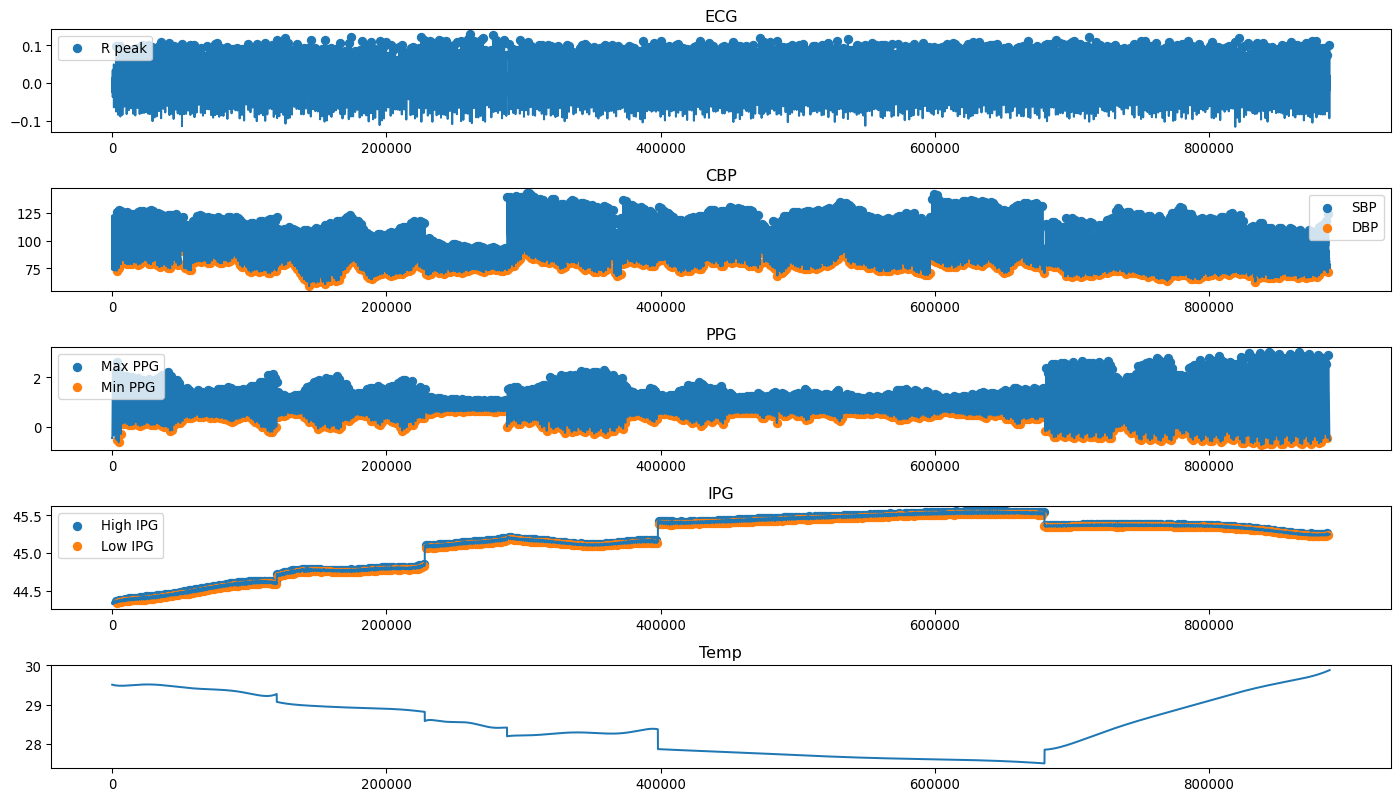

In [57]:
from scipy import signal
peak_window = 20 * fs # 20sec per detecting
seg_index = list(range(0, len(S1_ori['ECGf']), peak_window))
seg_index.append(len(S1_ori['ECGf']))
print(f"Seg_index: {seg_index}")

r_peak_index = []
for i in range(len(seg_index) - 1): #len(seg_index) - 1
    ecg_peak_signal = S1_ori['ECGf'][seg_index[i]:seg_index[i+1]]
    height = 0.5 * np.max(ecg_peak_signal)
    distance = 60 / 100 * fs
    #prominence = 0.5 * (np.max(filtered_ecg) - np.min(filtered_ecg))
    r_peak_index_seg, r_peak_value_fil = signal.find_peaks(ecg_peak_signal, height=height, distance=distance)
    r_peak_index += list(r_peak_index_seg + seg_index[i])
print(f"R peak index: {len(r_peak_index)}, {r_peak_index}")

sbp_index = []
dbp_index = []
max_ppg_index = []
min_ppg_index = []
high_ipg_index = []
low_ipg_index = []
for i in range(len(r_peak_index)-1):
    cbp_seg = S1_ori['CBP'][r_peak_index[i]:r_peak_index[i+1]]
    sbp_index.append(r_peak_index[i] + np.argmax(cbp_seg))
    cbp_seg_half = S1_ori['CBP'][r_peak_index[i]:sbp_index[-1]]
    dbp_index.append(r_peak_index[i] + np.argmin(cbp_seg_half))
    ppg_seg = S1_ori['PPG'][r_peak_index[i]:r_peak_index[i+1]]
    max_ppg_index.append(r_peak_index[i] + np.argmax(ppg_seg))
    ppg_seg_half = S1_ori['PPG'][r_peak_index[i]:max_ppg_index[-1]]
    min_ppg_index.append(r_peak_index[i] + np.argmin(ppg_seg_half))
    ipg_seg = S1_ori['IPG'][r_peak_index[i]:r_peak_index[i+1]]
    low_ipg_index.append(r_peak_index[i] + np.argmin(ipg_seg))
    ipg_seg_half = S1_ori['IPG'][r_peak_index[i]:low_ipg_index[-1]]
    high_ipg_index.append(r_peak_index[i] + np.argmax(ipg_seg_half))
print(f"SBP index: {len(sbp_index)}, {sbp_index}\nDBP index: {len(dbp_index)}, {dbp_index}")
print(f"Max PPG index: {len(max_ppg_index)}, {max_ppg_index}\nMin PPG index: {len(min_ppg_index)}, {min_ppg_index}")
print(f"High IPG index: {len(high_ipg_index)}, {high_ipg_index}\nLow IPG index: {len(low_ipg_index)}, {low_ipg_index}")

begin_index = 0
end_index = len(S1_ori['ECGf']) #10 * peak_window
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18, 10), dpi=96)
axs[0].plot(S1_ori['ECGf'][begin_index:end_index])
axs[0].scatter(r_peak_index, S1_ori['ECGf'][r_peak_index], label='R peak')
axs[0].set_title('ECG')
axs[0].legend()

axs[1].plot(S1_ori['CBP'][begin_index:end_index])
axs[1].scatter(sbp_index, S1_ori['CBP'][sbp_index],label='SBP')
axs[1].scatter(dbp_index, S1_ori['CBP'][dbp_index],label='DBP')
axs[1].set_title('CBP')
axs[1].legend()

axs[2].plot(S1_ori['PPG'][begin_index:end_index])
axs[2].scatter(max_ppg_index, S1_ori['PPG'][max_ppg_index], label='Max PPG')
axs[2].scatter(min_ppg_index, S1_ori['PPG'][min_ppg_index], label='Min PPG')
axs[2].set_title('PPG')
axs[2].legend()

axs[3].plot(S1_ori['IPG'][begin_index:end_index])
axs[3].scatter(high_ipg_index, S1_ori['IPG'][high_ipg_index],label='High IPG')
axs[3].scatter(low_ipg_index, S1_ori['IPG'][low_ipg_index],label='Low IPG')
axs[3].set_title('IPG')
axs[3].legend()

axs[4].plot(S1_ori['Temp'][begin_index:end_index])
axs[4].set_title('Temp')
fig.subplots_adjust(hspace=0.55)
plt.savefig(f"{result_path}/S1_{int(end_index/fs)}s_key_points.png")
plt.show()

In [58]:
## Get Features
features = {}
features['heart_rate'] = [(r_peak_index[i+1] - r_peak_index[i])/fs for i in range(len(r_peak_index)-1)]
print(f"max HR:{max(features['heart_rate'])}, min HR:{min(features['heart_rate'])}, len HR:{len(features['heart_rate'])}")
features['R_peak'] = S1_ori['ECGf'][r_peak_index[:-1]]
print(f"max R_peak:{max(features['R_peak'])}, min R_peak:{min(features['R_peak'])}, len R_peak:{len(features['R_peak'])}")
features['PTT'] = [(max_ppg_index[i] - r_peak_index[i]) / fs for i in range(len(max_ppg_index))]
print(f"max PTT:{max(features['PTT'])}, min PTT:{min(features['PTT'])}, len PTT:{len(features['PTT'])}")
features['Max_PPG'] = S1_ori['PPG'][max_ppg_index]
print(f"max Max_PPG:{max(features['Max_PPG'])}, min Max_PPG:{min(features['Max_PPG'])}, len Max_PPG:{len(features['Max_PPG'])}")
features['Min_PPG'] = S1_ori['PPG'][min_ppg_index]
print(f"max Min_PPG:{max(features['Min_PPG'])}, min Min_PPG:{min(features['Min_PPG'])}, len Min_PPG:{len(features['Min_PPG'])}")
features['dPPG'] = features['Max_PPG'] - features['Min_PPG']
print(f"max dPPG:{max(features['dPPG'])}, min dPPG:{min(features['dPPG'])}, len dPPG:{len(features['dPPG'])}")
features['PPG_width'] = [(min_ppg_index[i+1] - min_ppg_index[i])/fs for i in range(len(min_ppg_index) - 1)]
features['PPG_width'].append((r_peak_index[-1] - min_ppg_index[-1])/fs)
print(f"max PPG_width:{max(features['PPG_width'])}, min PPG_width:{min(features['PPG_width'])}, len PPG_width:{len(features['PPG_width'])}")
features['High_IPG'] = S1_ori['IPG'][high_ipg_index]
print(f"max High_IPG:{max(features['High_IPG'])}, min High_IPG:{min(features['High_IPG'])}, len High_IPG:{len(features['High_IPG'])}")
features['Low_IPG'] = S1_ori['IPG'][low_ipg_index]
print(f"max Low_IPG:{max(features['Low_IPG'])}, min Low_IPG:{min(features['Low_IPG'])}, len Low_IPG:{len(features['Low_IPG'])}")
features['dIPG'] = features['High_IPG'] - features['Low_IPG']
print(f"max dIPG:{max(features['dIPG'])}, min dIPG:{min(features['dIPG'])}, len dIPG:{len(features['dIPG'])}")
features['IPG_small_area'] = []
features['IPG_large_area'] = []
max_ipg = max(S1_ori['IPG'])
for i in range(len(r_peak_index) - 1):
    ipg_seg = S1_ori['IPG'][r_peak_index[i]:r_peak_index[i+1]]
    features['IPG_small_area'].append(sum([(max(ipg_seg) - ipg_seg[d]) for d in range(len(ipg_seg))]) / fs)
    features['IPG_large_area'].append(sum([(max_ipg - ipg_seg[d]) for d in range(len(ipg_seg))]) / fs)
print(f"max IPG_small_area:{max(features['IPG_small_area'])}, min IPG_small_area:{min(features['IPG_small_area'])}, len IPG_small_area:{len(features['IPG_small_area'])}")   
print(f"max IPG_large_area:{max(features['IPG_large_area'])}, min IPG_large_area:{min(features['IPG_large_area'])}, len IPG_large_area:{len(features['IPG_large_area'])}")
features['ave_Temp'] = [np.mean(S1_ori['Temp'][r_peak_index[i]: r_peak_index[i+1]]) for i in range(len(r_peak_index) - 1)]
print(f"max ave_Temp:{max(features['ave_Temp'])}, min ave_Temp:{min(features['ave_Temp'])}, len ave_Temp:{len(features['ave_Temp'])}")
features['SBP'] = S1_ori['CBP'][sbp_index]
print(f"max SBP:{max(features['SBP'])}, min SBP:{min(features['SBP'])}, len SBP:{len(features['SBP'])}")
features['DBP'] = S1_ori['CBP'][dbp_index]
print(f"max DBP:{max(features['DBP'])}, min DBP:{min(features['DBP'])}, len DBP:{len(features['DBP'])}")
features['PBP'] = features['SBP'] - features['DBP']
print(f"max PBP:{max(features['PBP'])}, min PBP:{min(features['PBP'])}, len PBP:{len(features['PBP'])}")

max HR:0.9295, min HR:0.4275, len HR:557
max R_peak:0.13154163396668633, min R_peak:0.062281091088195274, len R_peak:557
max PTT:0.5055, min PTT:0.2655, len PTT:557
max Max_PPG:3.038575866979931, min Max_PPG:0.976472368936435, len Max_PPG:557
max Min_PPG:0.6624143392323292, min Min_PPG:-0.7427869975048409, len Min_PPG:557
max dPPG:3.6196969313669447, min dPPG:0.3304610066554692, len dPPG:557
max PPG_width:1.013, min PPG_width:0.428, len PPG_width:557
max High_IPG:45.557422113460575, min High_IPG:44.3669418545431, len High_IPG:557
max Low_IPG:45.52187648541349, min Low_IPG:44.34160361598648, len Low_IPG:557
max dIPG:0.18795411629076142, min dIPG:0.017516857081432136, len dIPG:557
max IPG_small_area:0.18657109473016567, min IPG_small_area:0.005008697581797793, len IPG_small_area:557
max IPG_large_area:0.9636386065562141, min IPG_large_area:0.01341572525716176, len IPG_large_area:557
max ave_Temp:29.866282701153494, min ave_Temp:27.515381688949713, len ave_Temp:557
max SBP:143.31040165980

In [60]:
import pandas as pd
features_df = pd.DataFrame(features)
display(features_df)
features_df.to_csv(f"{result_path}/S1_ori_features.csv")

,heart_rate,R_peak,PTT,Max_PPG,Min_PPG,dPPG,PPG_width,High_IPG,Low_IPG,dIPG,IPG_small_area,IPG_large_area,ave_Temp,SBP,DBP,PBP
0,0.7895,0.097175,0.4145,2.631662,-0.526629,3.158291,0.7935,44.366942,44.341604,0.025338,0.008158,0.948042,29.489265,125.640740,73.028484,52.612256
1,0.7865,0.098778,0.4130,2.246744,-0.629308,2.876052,0.7995,44.376969,44.353832,0.023137,0.008603,0.937030,29.485417,127.715934,75.469888,52.246046
2,0.7485,0.098724,0.4080,2.012179,-0.295080,2.307259,0.6880,44.383322,44.355027,0.028294,0.009464,0.888279,29.484218,126.556267,78.918371,47.637896
3,0.7535,0.085564,0.3950,1.887730,0.131710,1.756020,0.7960,44.382474,44.358280,0.024194,0.009114,0.889585,29.484942,124.084345,82.366854,41.717491
4,0.7980,0.077317,0.3970,2.060073,0.163667,1.896405,0.8015,44.391909,44.358748,0.033161,0.008538,0.938617,29.487146,125.396600,79.620275,45.776325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.7910,0.093136,0.4275,2.832127,-0.665156,3.497283,0.7765,45.251681,45.230526,0.021155,0.009895,0.251736,29.784559,112.365606,69.030685,43.334921
553,0.7780,0.089969,0.4325,2.769006,-0.616022,3.385028,0.8045,45.253131,45.230310,0.022821,0.010808,0.247547,29.803046,114.440799,71.319501,43.121298
554,0.7355,0.093092,0.4340,2.423905,-0.464384,2.888289,0.7825,45.251622,45.231234,0.020388,0.008053,0.232969,29.822143,111.297492,73.944010,37.353481
555,0.7925,0.094304,0.4305,2.546626,-0.292961,2.839587,0.7215,45.252304,45.230076,0.022228,0.009945,0.249724,29.842837,117.736695,73.150554,44.586141


In [11]:
[i for i in features['IPG_small_area'] if i > 3*np.mean(features['IPG_small_area'])]

[0.03773950586461154, 0.2320046936022119]

In [61]:
features_fil_df = features_df[features_df['IPG_small_area'] < 3 * np.mean(features['IPG_small_area'])]
features_norm = {}
features_norm['heart_rate'] = features_fil_df['heart_rate']
features_norm['R_peak'] = [(i - min(features_fil_df['R_peak'])) / (max(features_fil_df['R_peak']) - min(features_fil_df['R_peak'])) for i in features_fil_df['R_peak']]#[((i - min_r_peak) / (max_r_peak - min_r_peak)) for i in features_fil_df['R_peak']]#[(i - min(features_fil_df['R_peak'])) / (max(features_fil_df['R_peak']) - min(features_fil_df['R_peak'])) for i in features_fil_df['R_peak']]
features_norm['PTT'] = features_fil_df['PTT']
min_ori_ppg, max_ori_ppg = min(S1_ori['PPG']), max(S1_ori['PPG'])
features_norm['Max_PPG'] = [(i - min_ori_ppg) / (max_ori_ppg - min_ori_ppg) for i in features_fil_df['Max_PPG']]
features_norm['Min_PPG'] = [(i - min_ori_ppg) / (max_ori_ppg - min_ori_ppg) for i in features_fil_df['Min_PPG']]
features_norm['dPPG'] = [(features_norm['Max_PPG'][i] - features_norm['Min_PPG'][i]) for i in range(len(features_norm['Max_PPG']))]
features_norm['PPG_width'] = [(i - min(features_fil_df['PPG_width'])) / (max(features_fil_df['PPG_width']) - min(features_fil_df['PPG_width'])) for i in features_fil_df['PPG_width']]
min_ori_ipg, max_ori_ipg = min(S1_ori['IPG']), max(S1_ori['IPG'])
features_norm['High_IPG'] = [(i - min_ori_ipg) / (max_ori_ipg - min_ori_ipg) for i in features_fil_df['High_IPG']]#[(i - min(S1_ori['IPG'])) / (max(S1_ori['IPG']) - min(S1_ori['IPG'])) for i in features_fil_df['High_IPG']]
features_norm['Low_IPG'] = [(i - min_ori_ipg) / (max_ori_ipg - min_ori_ipg) for i in features_fil_df['Low_IPG']]#[(i - min(S1_ori['IPG'])) / (max(S1_ori['IPG']) - min(S1_ori['IPG'])) for i in features_fil_df['Low_IPG']]
features_norm['dIPG'] = [(features_norm['High_IPG'][i] - features_norm['Low_IPG'][i]) for i in range(len(features_norm['High_IPG']))]
features_norm['IPG_small_area'] = [(i - min( features_fil_df['IPG_small_area'])) / (max( features_fil_df['IPG_small_area']) - min( features_fil_df['IPG_small_area'])) for i in features_fil_df['IPG_small_area']]
features_norm['IPG_large_area'] = [(i - min(features_fil_df['IPG_large_area'])) / (max(features_fil_df['IPG_large_area']) - min(features_fil_df['IPG_large_area'])) for i in features_fil_df['IPG_large_area']]
features_norm['ave_Temp'] = [(i - min(features_fil_df['ave_Temp'])) / (max(features_fil_df['ave_Temp']) - min(features_fil_df['ave_Temp'])) for i in features_fil_df['ave_Temp']]
min_ori_cbp, max_ori_cbp = min(S1_ori['CBP']), max(S1_ori['CBP'])
features_norm['SBP'] = [(i - min_ori_cbp) / (max_ori_cbp - min_ori_cbp) for i in features_fil_df['SBP']]#[(i - min(S1_ori['CBP'])) / (max(S1_ori['CBP']) - min(S1_ori['CBP'])) for i in features_fil_df['SBP']]
features_norm['DBP'] = [(i - min_ori_cbp) / (max_ori_cbp - min_ori_cbp) for i in features_fil_df['DBP']]#[(i - min(S1_ori['CBP'])) / (max(S1_ori['CBP']) - min(S1_ori['CBP'])) for i in features_fil_df['DBP']]
features_norm['PBP'] = [(features_norm['SBP'][i] - features_norm['DBP'][i]) for i in range(len(features_norm['SBP']))]

In [62]:
import pandas as pd
features_norm_df = pd.DataFrame(features_norm)
display(features_norm_df)
features_norm_df.to_csv(f"{result_path}/S1_norm_features.csv")

,heart_rate,R_peak,PTT,Max_PPG,Min_PPG,dPPG,PPG_width,High_IPG,Low_IPG,dIPG,IPG_small_area,IPG_large_area,ave_Temp,SBP,DBP,PBP
0,0.7895,0.503805,0.4145,0.892390,0.057164,0.835226,0.435006,0.037105,0.016611,0.020494,0.238333,0.983587,0.839629,0.790141,0.165277,0.624864
1,0.7865,0.526953,0.4130,0.790596,0.030010,0.760586,0.450450,0.045215,0.026502,0.018714,0.271982,0.971997,0.837991,0.814788,0.194273,0.620515
2,0.7485,0.526166,0.4080,0.728564,0.118398,0.610166,0.163449,0.050354,0.027469,0.022885,0.337187,0.920692,0.837482,0.801015,0.235230,0.565785
3,0.7535,0.336165,0.3950,0.695653,0.231265,0.464388,0.441441,0.049668,0.030100,0.019569,0.310693,0.922067,0.837790,0.771656,0.276187,0.495469
4,0.7980,0.217096,0.3970,0.741230,0.239716,0.501514,0.455598,0.057299,0.030478,0.026821,0.267051,0.973668,0.838727,0.787242,0.243567,0.543675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.7910,0.445490,0.4275,0.945404,0.020530,0.924874,0.391248,0.752708,0.735597,0.017110,0.369770,0.250805,0.965237,0.632476,0.117796,0.514679
553,0.7780,0.399765,0.4325,0.928711,0.033524,0.895187,0.463320,0.753881,0.735422,0.018458,0.438866,0.246396,0.973101,0.657122,0.144980,0.512142
554,0.7355,0.444856,0.4340,0.837447,0.073625,0.763822,0.406692,0.752660,0.736170,0.016490,0.230413,0.231055,0.981225,0.619790,0.176151,0.443639
555,0.7925,0.462354,0.4305,0.869901,0.118959,0.750943,0.249678,0.753212,0.735233,0.017979,0.373526,0.248688,0.990027,0.696267,0.166727,0.529540


In [7]:
import pandas as pd
F_rest = pd.read_csv(f'{result_path}/S1rest_norm_features.csv')
F_CT = pd.read_csv(f'{result_path}/S1CT_norm_features.csv')
F_recover = pd.read_csv(f'{result_path}/S1recover_norm_features.csv')
F_S1 = pd.read_csv(f'{result_path}/S1_norm_features.csv')
F_recover[:100]

,Unnamed: 0,heart_rate,R_peak,PTT,Max_PPG,Min_PPG,dPPG,PPG_width,High_IPG,Low_IPG,dIPG,IPG_small_area,IPG_large_area,ave_Temp,SBP,DBP,PBP
0,0,0.8150,0.703663,0.4395,0.713793,0.152424,0.561369,0.828530,0.250580,0.198961,0.051618,0.394699,0.755884,0.793427,0.953441,0.097976,0.855466
1,1,0.7915,0.259300,0.4290,0.634674,0.191225,0.443449,0.409222,0.241408,0.187119,0.054288,0.303537,0.740271,0.798542,0.879757,0.140486,0.739271
2,2,0.7950,0.472009,0.4350,0.725114,0.218508,0.506606,0.481268,0.236426,0.181275,0.055151,0.416631,0.751833,0.801902,0.936842,0.121053,0.815789
3,3,0.7970,0.253640,0.4400,0.727162,0.193772,0.533390,0.476945,0.228320,0.175852,0.052468,0.453891,0.762925,0.804087,0.962348,0.157895,0.804453
4,4,0.8035,0.402658,0.4415,0.691521,0.155720,0.535801,0.517291,0.218421,0.168491,0.049930,0.236603,0.772905,0.805509,0.931984,0.182996,0.748988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.7995,0.576592,0.4190,0.673615,0.156364,0.517251,0.524496,0.742366,0.665831,0.076536,0.654667,0.255894,0.331982,0.786235,0.126316,0.659919
96,97,0.7545,0.591037,0.4090,0.578539,0.224190,0.354349,0.252161,0.743321,0.658192,0.085128,0.518167,0.236512,0.329435,0.761538,0.180162,0.581377
97,98,0.8095,0.286075,0.4015,0.599574,0.294111,0.305463,0.318444,0.742841,0.665166,0.077675,0.390320,0.251003,0.326853,0.793117,0.196761,0.596356
98,99,0.8215,0.410367,0.3940,0.630480,0.314816,0.315665,0.793948,0.741353,0.662491,0.078862,0.401416,0.255257,0.324142,0.823482,0.164777,0.658704


In [8]:
split_rate = 0.7
features_cross = pd.concat([F_rest[:int(split_rate*len(F_rest))], F_CT[:int(split_rate*len(F_CT))], F_recover[:int(split_rate*len(F_recover))], F_rest[int(split_rate*len(F_rest)):], F_CT[int(split_rate*len(F_CT)):], F_recover[int(split_rate*len(F_recover)):]], ignore_index=True)
features_cross.to_csv(f"{result_path}/S1_features_cross.csv")

In [13]:
min_bp, max_bp = min(S1_ori['CBP']), max(S1_ori['CBP'])
split_rate = 0.7
time_step = 10
layers = 3
epochs = 200
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("GPU is not available.")

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
class ABPLoss(nn.Module):
    def __init__(self):
        super(ABPLoss, self).__init__()

    def forward(self, predicted, target):
        # Custom loss calculation
        pred_bp = predicted * (max_bp - min_bp) + min_bp
        targ_bp = target * (max_bp - min_bp) + min_bp
        mse_loss = nn.MSELoss()
        loss = mse_loss(pred_bp, targ_bp) # Define your loss calculation here
        #print(f'ABP loss: {loss.item()}')
        return loss
    
class PBPLoss(nn.Module):
    def __init__(self):
        super(PBPLoss, self).__init__()

    def forward(self, predicted, target):
        # Custom loss calculation
        pred_bp = predicted * (max_bp - min_bp)
        targ_bp = target * (max_bp - min_bp)
        mse_loss = nn.MSELoss()
        loss = mse_loss(pred_bp, targ_bp) # Define your loss calculation here
        return loss

def get_weight_heat_map(weights):
    #print([list(weights.values())[w].shape for w in range(len(list(weights.values())))])
    features_weights = list(weights.values())[0]
    weight_seg_index = list(range(0, len(features_weights), int(features_weights.shape[0] / features_weights.shape[1] +1)))
    weight_seg_index.append(len(features_weights))
    weight_comp = torch.zeros((len(weight_seg_index)-1, features_weights.shape[1]))
    for i in range(len(weight_seg_index) - 1):
        weight_comp[i, :] = torch.mean(abs(features_weights[weight_seg_index[i]:weight_seg_index[i+1], :]), dim=0)
    sorted_indices = np.argsort(-weight_comp.sum(dim=0))
    sorted_weight_comp = weight_comp[:, sorted_indices]
    plt.imshow(sorted_weight_comp, cmap='hot', origin='lower')
    plt.colorbar()
    labels = list(features_cross.iloc[:, 1:].keys())[:-3]
    sorted_labels = [labels[i] for i in sorted_indices]
    plt.xticks(range(len(sorted_labels)), sorted_labels, rotation=60)
    #plt.xticks(range(len(labels)), labels, rotation=60)
    plt.xlabel('Features')
    plt.ylabel(f'Weight per {int(features_weights.shape[0] / features_weights.shape[1] +1)}beats')
    plt.title('Weights Heat Map')
    for i in range(sorted_weight_comp.shape[0]):
        for j in range(sorted_weight_comp.shape[1]):
            plt.text(j, i, f'{sorted_weight_comp[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)
    plt.show()
    return list(weights.values())

def est_bp_lstm(features_bps, layers=4, epochs=200):
    features = features_bps.iloc[:, :-3]
    bps = features_bps.iloc[:, -3:]
    #print(f'features shape: {features.shape}, \n{features} \nbps shape: {bps.shape}, \n{bps}')
    features_reshape = np.zeros(((features.shape[0] - time_step + 1), time_step, features.shape[1]))
    bps_reshape = np.zeros(((bps.shape[0] - time_step + 1), time_step, bps.shape[1]))
    for i in range(len(features_reshape)):
        features_reshape[i] = features[i : (time_step + i)]
        bps_reshape[i] = bps[i : (time_step + i)]
    train_length = int(split_rate * len(features_reshape))
    X_train = torch.Tensor(features_reshape[ : train_length])
    X_test = torch.Tensor(features_reshape[train_length: ])
    y_train = {}
    y_train['SBP'] = torch.Tensor(bps_reshape[ : train_length, : , 0])
    y_train['DBP'] = torch.Tensor(bps_reshape[ : train_length, : , 1])
    y_train['PBP'] = torch.Tensor(bps_reshape[ : train_length, : , 2])
    #y_train['Type'] = 'Train'
    y_test = {}
    y_test['SBP'] = torch.Tensor(bps_reshape[train_length : , : , 0])
    y_test['DBP'] = torch.Tensor(bps_reshape[train_length : , : , 1])
    y_test['PBP'] = torch.Tensor(bps_reshape[train_length : , : , 2])
    #y_test['Type'] = 'Test'

    sbp_model = LSTMModel(input_size=features_reshape.shape[2], hidden_size=64, num_layers=layers, output_size=time_step)
    dbp_model = LSTMModel(input_size=features_reshape.shape[2], hidden_size=64, num_layers=layers, output_size=time_step)
    pbp_model = LSTMModel(input_size=features_reshape.shape[2], hidden_size=64, num_layers=layers, output_size=time_step)
    abp_loss_fn = ABPLoss()
    pbp_loss_fn = PBPLoss()

    ## Use GPU to run
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    sbp_model.to(device)
    dbp_model.to(device)
    pbp_model.to(device)
    X_train = X_train.to(device)
    X_test = X_test.to(device)
    y_train['SBP'] = y_train['SBP'].to(device)
    #y_test['SBP'] = y_test['SBP'].to(device)
    y_train['DBP'] = y_train['DBP'].to(device)
    #y_test['DBP'] = y_test['DBP'].to(device)
    y_train['PBP'] = y_train['PBP'].to(device)
    #y_test['PBP'] = y_test['PBP'].to(device)
    abp_loss_function = abp_loss_fn.to(device)
    pbp_loss_function = pbp_loss_fn.to(device)

    ## Check if model is using GPU
    if next(sbp_model.parameters()).is_cuda:
        print("Model is using GPU.")
    else:
        print("Model is using CPU.")

    ## Fit BP models
    num_epochs = epochs
    optimizer = torch.optim.Adam(sbp_model.parameters(), lr=0.002)
    #num_epochs = 500
    for epoch in range(num_epochs):
        output = sbp_model(X_train)
        loss = abp_loss_function(output.squeeze(), y_train['SBP'])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}, loss: {loss.item()}')

    '''optimizer = torch.optim.Adam(dbp_model.parameters(), lr=0.002)
    #num_epochs = 200
    for epoch in range(num_epochs):
        output = dbp_model(X_train)
        loss = abp_loss_function(output.squeeze(), y_train['DBP'])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}, loss: {loss.item()}')'''
        
    '''optimizer = torch.optim.Adam(pbp_model.parameters(), lr=0.001)
    #num_epochs = 200
    for epoch in range(num_epochs):
        output = pbp_model(X_train)
        loss = pbp_loss_function(output.squeeze(), y_train['PBP'])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #if (epoch+1) % 10 == 0:
        #   print(f'Epoch {epoch+1}, loss: {loss.item()}')'''

    ## Predict BP
    y_pred = {}
    y_pred['SBP'] = sbp_model(X_test)
    y_pred['DBP'] = dbp_model(X_test)
    y_pred['PBP'] = pbp_model(X_test)
    #y_pred['Type'] = 'Pred'

    weights_sbp = sbp_model.state_dict()
    sbp_weight = get_weight_heat_map(weights_sbp)


    results = {}
    results['BP'] = ['SBP', 'DBP', 'PBP']
    results['ref_BP'] = [y_test['SBP'][:, -1] * (max_bp - min_bp) + min_bp, y_test['DBP'][:, -1] * (max_bp - min_bp) + min_bp, y_test['PBP'][:, -1] * (max_bp - min_bp)]
    results['pred_BP'] = [(y_pred['SBP'][:, -1] * (max_bp - min_bp) + min_bp).cpu(), (y_pred['DBP'][:, -1] * (max_bp - min_bp) + min_bp).cpu(), (y_pred['PBP'][:, -1] * (max_bp - min_bp)).cpu()]
    results['MAE'] = ["{:.4f}".format(torch.mean(torch.abs(results['ref_BP'][i] - results['pred_BP'][i])).item()) for i in range(3)]
    results['RMSE'] = ["{:.4f}".format(torch.sqrt(torch.mean((results['ref_BP'][i] - results['pred_BP'][i]) ** 2)).item()) for i in range(3)]

    ## Compare BPs
    #if float(results["MAE"][0]) <= 7 or float(results["MAE"][1])<=3:
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 6), dpi=96)
    for i in range(3):
        axs[i].plot(results['ref_BP'][i], label='Reference BP')
        axs[i].plot(results['pred_BP'][i].cpu().detach().numpy(), label='Predict BP')
        axs[i].set_title(f'{results["BP"][i]} MAE: {results["MAE"][i]}, RMSE: {results["RMSE"][i]}')
        axs[i].legend()
    fig.suptitle(f'S1 LSTM Model {layers}layers {num_epochs}epochs')
    plt.tight_layout()
    plt.savefig(f'{result_path}/S1_LSTM_{layers}layers_{num_epochs}epochs.png', format='png')
    plt.show()
    return sbp_weight

#for l in range(2,7):
    #layers=l
    #for i in range(5,20):
        #epochs = 100 * i
        #est_bp_lstm(features_norm_df, layers, epochs)

GPU is available.


Model is using GPU.
Epoch 10, loss: 346.8841857910156
Epoch 20, loss: 154.00167846679688
Epoch 30, loss: 68.01640319824219
Epoch 40, loss: 61.72010040283203
Epoch 50, loss: 60.78117370605469
Epoch 60, loss: 58.36259841918945
Epoch 70, loss: 57.41929244995117
Epoch 80, loss: 57.16218566894531
Epoch 90, loss: 57.05828094482422
Epoch 100, loss: 56.996578216552734
Epoch 110, loss: 56.91554260253906
Epoch 120, loss: 56.77674865722656
Epoch 130, loss: 56.56456756591797
Epoch 140, loss: 56.24860763549805
Epoch 150, loss: 55.71536636352539
Epoch 160, loss: 54.4407844543457
Epoch 170, loss: 52.18085479736328
Epoch 180, loss: 49.61955642700195
Epoch 190, loss: 46.66735076904297
Epoch 200, loss: 44.131473541259766
Epoch 210, loss: 42.75593566894531
Epoch 220, loss: 41.870540618896484
Epoch 230, loss: 41.37705993652344
Epoch 240, loss: 40.858642578125
Epoch 250, loss: 40.431636810302734
Epoch 260, loss: 39.77096939086914
Epoch 270, loss: 37.68960952758789
Epoch 280, loss: 35.05438995361328
Epoch 2

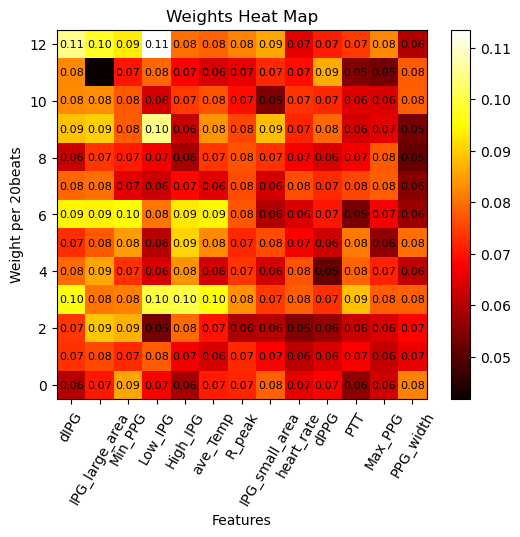

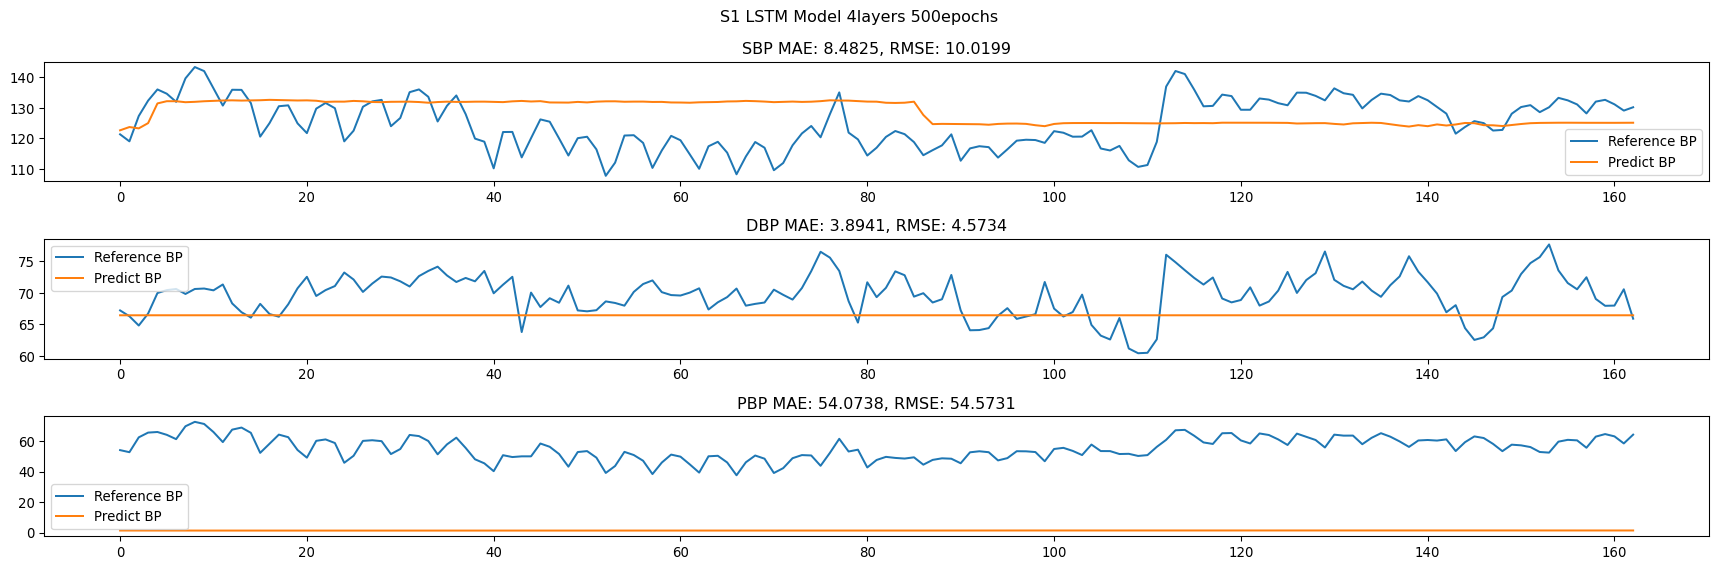

[tensor([[ 0.1372, -0.0548,  0.0181,  ..., -0.0833,  0.0958,  0.1168],
         [-0.0657,  0.0777,  0.0678,  ...,  0.2384,  0.0789, -0.0645],
         [ 0.0192, -0.0816, -0.0450,  ...,  0.0349, -0.0773,  0.0484],
         ...,
         [-0.0193,  0.0837,  0.0214,  ..., -0.0810,  0.1665,  0.1156],
         [ 0.2749,  0.3566,  0.2891,  ...,  0.1890,  0.3836,  0.3533],
         [ 0.0660, -0.0403, -0.0848,  ...,  0.1711,  0.1584, -0.0075]],
        device='cuda:0'),
 tensor([[-0.0904, -0.0678,  0.1342,  ..., -0.1363,  0.2413,  0.0825],
         [-0.0015, -0.0046, -0.0284,  ..., -0.0223, -0.4801, -0.0403],
         [-0.0152,  0.1591,  0.1517,  ..., -0.0651,  0.0641,  0.1258],
         ...,
         [ 0.0181,  0.0442, -0.0032,  ..., -0.1056,  0.0743, -0.1233],
         [ 0.1971, -0.2911, -0.2788,  ..., -0.2934,  0.2072, -0.4415],
         [ 0.1162,  0.0211, -0.0429,  ...,  0.0178, -0.1397,  0.0752]],
        device='cuda:0'),
 tensor([ 0.0292,  0.1446,  0.0212, -0.0069, -0.0801, -0.0895,  0.

In [14]:
result = est_bp_lstm(features_cross.iloc[:, 1:], layers=4, epochs=500)
result

In [22]:
256/0.7

365.7142857142857

In [18]:
for i in range(len(result)):
    print(result[i].shape)

torch.Size([256, 13])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([10, 64])
torch.Size([10])


In [23]:
features_cross.iloc[:, 1:]

,heart_rate,R_peak,PTT,Max_PPG,Min_PPG,dPPG,PPG_width,High_IPG,Low_IPG,dIPG,IPG_small_area,IPG_large_area,ave_Temp,SBP,DBP,PBP
0,0.7895,0.574403,0.4145,0.892390,0.057164,0.835226,0.154843,0.043086,0.019288,0.023797,0.238333,0.988261,0.811365,0.927660,0.194043,0.733617
1,0.7865,0.600795,0.4130,0.790596,0.030010,0.760586,0.163029,0.052503,0.030773,0.021730,0.271982,0.975295,0.809439,0.956596,0.228085,0.728511
2,0.7485,0.599897,0.4080,0.728564,0.118398,0.610166,0.010914,0.058470,0.031896,0.026574,0.337187,0.923137,0.808840,0.940426,0.276170,0.664255
3,0.7535,0.383272,0.3950,0.695653,0.231265,0.464388,0.158254,0.057673,0.034951,0.022723,0.310693,0.923691,0.809202,0.905957,0.324255,0.581702
4,0.7980,0.247518,0.3970,0.741230,0.239716,0.501514,0.165757,0.066534,0.035390,0.031144,0.267051,0.974819,0.810304,0.924255,0.285957,0.638298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,0.8345,0.500815,0.4085,0.708549,0.258485,0.450064,0.848703,0.967664,0.900493,0.067171,0.380336,0.023559,0.016958,0.865992,0.117814,0.748178
547,0.8405,0.397742,0.4180,0.704514,0.226382,0.478132,0.615274,0.969109,0.906724,0.062385,0.425607,0.023588,0.012783,0.872874,0.104858,0.768016
548,0.7935,0.601369,0.4155,0.687557,0.222758,0.464799,0.482709,0.963682,0.895967,0.067715,0.360903,0.023555,0.008602,0.855466,0.105263,0.750202
549,0.8085,0.093458,0.4120,0.656130,0.261480,0.394651,0.466859,0.962384,0.894401,0.067982,0.195523,0.020658,0.004397,0.831174,0.136032,0.695142


In [125]:
#result100 = {}

result100['SBP Ground Truth'] = result['ref_BP'][0]#3, 10000
result100['SBP Prediction'] = result['pred_BP'][0]

result100

{'SBP Ground Truth': tensor([121.3473, 119.0542, 127.3307, 132.3468, 136.0013, 134.6040, 131.9526,
         139.6200, 143.3104, 141.9847, 136.3954, 130.7345, 135.8938, 135.8580,
         131.5585, 120.5949, 125.0018, 130.5195, 130.8061, 124.9302, 121.7414,
         129.7312, 131.5944, 129.8746, 119.0542, 122.5296, 130.3403, 132.0959,
         132.5976, 123.9986, 126.6858, 135.1056, 136.0013, 133.6008, 125.5393,
         130.6628, 134.0307, 127.9398, 119.9500, 118.9467, 110.2403, 122.0997,
         122.1355, 113.8232, 120.0933, 126.2200, 125.4676, 120.0216, 114.4323,
         120.0933, 120.5591, 116.4387, 107.8040, 112.1034, 120.9532, 121.0607,
         118.5526, 110.3836, 116.0804, 120.8457, 119.4125, 114.7906, 110.0970,
         117.4419, 118.9109, 115.3639, 108.3056, 114.1098, 118.8393, 116.9762,
         109.6312, 111.9959, 117.7644, 121.6339, 124.0703, 120.3799, 127.9398,
         135.0339, 121.9106, 119.6947, 114.4294, 116.9827, 120.5102, 122.4284,
         121.4044, 118.8108, 114

In [133]:
result100['DBP Ground Truth'] = result['ref_BP'][1]
result100['DBP Prediction'] = result['pred_BP'][1]
result100

{'SBP Ground Truth': [121.34728240966797,
  119.05422973632812,
  127.3307113647461,
  132.3467559814453,
  136.00131225585938,
  134.60397338867188,
  131.95263671875,
  139.62002563476562,
  143.31039428710938,
  141.9847412109375,
  136.39541625976562,
  130.7344512939453,
  135.89382934570312,
  135.85800170898438,
  131.55853271484375,
  120.59487915039062,
  125.0018310546875,
  130.5194854736328,
  130.80612182617188,
  124.93017578125,
  121.74140167236328,
  129.7312469482422,
  131.5943603515625,
  129.87457275390625,
  119.05422973632812,
  122.52963256835938,
  130.34033203125,
  132.095947265625,
  132.59756469726562,
  123.99861907958984,
  126.685791015625,
  135.1055908203125,
  136.00131225585938,
  133.60076904296875,
  125.53926849365234,
  130.6627960205078,
  134.0307159423828,
  127.93980407714844,
  119.94995880126953,
  118.94674682617188,
  110.24032592773438,
  122.09968566894531,
  122.1355209350586,
  113.82321166992188,
  120.09327697753906,
  126.220016479

In [136]:
#result100['SBP Ground Truth'] = result100['SBP Ground Truth'].tolist()
#result100['SBP Prediction'] = result100['SBP Prediction'].tolist()
result100['DBP Ground Truth'] = result100['DBP Ground Truth'].tolist()
result100['DBP Prediction'] = result100['DBP Prediction'].tolist()
result100 = pd.DataFrame(result100)
result100.to_csv(f'{result_path}/S1_result100.csv')

In [126]:
result100 = pd.DataFrame(result100)
result100.to_csv(f'{result_path}/S1_result100.csv')

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.